<a href="https://colab.research.google.com/github/annissatessffaaye/QA-Data-Engineering-Bootcamp-Azure-Python-SQL/blob/main/04_2_EDA_Pandas_S_Analysis_Titianic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Science & Analysis 
## Notes 4.2, Exploratory Data Analysis & Visualization

## Objectives
* describe a standard EDA workflow
* EXTRA: describe a standard communication & reporting process
* write a program which uses pandas to:
    * obtain a subset of columns using list indexes
    * obtain a subset of rows using locator syntax  
    * obtain descriptive statistics 
    * applies a test to a column to discretize it
    * factor a continuous column with a discrete column
* write a program which uses seaborn and matplotlib to:
    * show univariate plots (eg., distplot)
    * show multivariate plots (eg., scatterplot)
    * EXTRA: customize plots

# Part 1: What is EDA?

## What is Exploratory Data Analysis?

* goal:
    * investigate
    * explain
    * describe
    * understand

* questions?
    * is there enough data?
    * is the data correct?
    * what is the distribution of each column?
    * how do the columns correlate?

* method
    * visual
    * primarily descriptive

## What are the tools for EDA in Python?

Simple pair: Pandas for data exploration, seaborn for visualization.


...but lots of options. 

## What are the challenges around EDA?

### Challenges of EDA:

* Strategic 
* Organizational
* Technical 

# Part 2: EDA with Pandas

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('datasets/titanic.csv')


## How do we EDA with Pandas?

* data quality, structure, etc. metrics; $\rightarrow$ `.info()`
* descriptive stats for all single columns; $\rightarrow$ `.describe()`, `.mean()`, `.value_counts()`
* descriptive stats for all pairs of columns; $\rightarrow$ `.corr()`
* domain-specific row subsets; $\rightarrow$ `df.loc`
* introduce factoring columns; $\rightarrow$ `.groupby`
* introduce domain-specific novel columns; $\rightarrow$ `df['bmi'] = df['w'] / df['h'] ** 2`

    

The purpose of computing a correlation score (default: pearson) is to determine *possible* relationships, rather than accurately measure correlation.

Note the *sign* of the score, and it's rough magnitude. You should plot all columns and pairs *regardless*. 

## Exercise (20 min)

Perform an EDA of the titanic dataset with pandas, include:

* data quality, structure, etc. metrics
    * `.info()`, `.isna().sum()`, etc.
* descriptive stats for all single columns
    * `.describe()`, `.mean()`, `.median()`, `.std()`, `.value_counts()`
* descriptive stats for all pairs of columns
    * ie., `.corr()`

In [5]:
#data quality, structure, etc. metrics;
df.info

<bound method DataFrame.info of      survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0           0       3    male  22.0  ...   NaN  Southampton     no  False
1           1       1  female  38.0  ...     C    Cherbourg    yes  False
2           1       3  female  26.0  ...   NaN  Southampton    yes   True
3           1       1  female  35.0  ...     C  Southampton    yes  False
4           0       3    male  35.0  ...   NaN  Southampton     no   True
..        ...     ...     ...   ...  ...   ...          ...    ...    ...
886         0       2    male  27.0  ...   NaN  Southampton     no   True
887         1       1  female  19.0  ...     B  Southampton    yes   True
888         0       3  female   NaN  ...   NaN  Southampton     no  False
889         1       1    male  26.0  ...     C    Cherbourg    yes   True
890         0       3    male  32.0  ...   NaN   Queenstown     no   True

[891 rows x 15 columns]>

In [58]:
new_df = df.dropna()

print(new_df.to_string())

     survived  pclass     sex    age  sibsp  parch      fare embarked   class    who  adult_male deck  embark_town alive  alone
1           1       1  female  38.00      1      0   71.2833        C   First  woman       False    C    Cherbourg   yes  False
3           1       1  female  35.00      1      0   53.1000        S   First  woman       False    C  Southampton   yes  False
6           0       1    male  54.00      0      0   51.8625        S   First    man        True    E  Southampton    no   True
10          1       3  female   4.00      1      1   16.7000        S   Third  child       False    G  Southampton   yes  False
11          1       1  female  58.00      0      0   26.5500        S   First  woman       False    C  Southampton   yes   True
21          1       2    male  34.00      0      0   13.0000        S  Second    man        True    D  Southampton   yes   True
23          1       1    male  28.00      0      0   35.5000        S   First    man        True    A  S

In [66]:
new_df.info

<bound method DataFrame.info of      survived  pclass     sex   age  ...  deck  embark_town  alive  alone
1           1       1  female  38.0  ...     C    Cherbourg    yes  False
3           1       1  female  35.0  ...     C  Southampton    yes  False
6           0       1    male  54.0  ...     E  Southampton     no   True
10          1       3  female   4.0  ...     G  Southampton    yes  False
11          1       1  female  58.0  ...     C  Southampton    yes   True
..        ...     ...     ...   ...  ...   ...          ...    ...    ...
871         1       1  female  47.0  ...     D  Southampton    yes  False
872         0       1    male  33.0  ...     B  Southampton     no   True
879         1       1  female  56.0  ...     C    Cherbourg    yes  False
887         1       1  female  19.0  ...     B  Southampton    yes   True
889         1       1    male  26.0  ...     C    Cherbourg    yes   True

[182 rows x 15 columns]>

In [68]:
#To discover duplicates, we can use the duplicated() method.
#The duplicated() method returns a Boolean values for each row:
print(new_df.duplicated())

1      False
3      False
6      False
10     False
11     False
       ...  
871    False
872    False
879    False
887    False
889    False
Length: 182, dtype: bool


In [69]:
#remove duplicates
#df.drop_duplicates(inplace = True)

In [72]:
#descriptive stats for all single columns
new_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [109]:
#descriptive stats for all single columns
new_df.value_counts()

survived  pclass  sex     age   sibsp  parch  fare      embarked  class  who    adult_male  deck  embark_town  alive  alone
1         1       female  24.0  0      0      69.3000   C         First  woman  False       B     Cherbourg    yes    True     2
          3       male    32.0  0      0      8.0500    S         Third  man    True        E     Southampton  yes    True     1
0         3       female  29.0  1      1      10.4625   S         Third  woman  False       G     Southampton  no     False    1
1         1       female  17.0  1      0      57.0000   S         First  woman  False       B     Southampton  yes    False    1
                          16.0  0      1      57.9792   C         First  woman  False       B     Cherbourg    yes    False    1
                                                                                                                              ..
                          51.0  1      0      77.9583   S         First  woman  False       D     Sout

In [84]:
#descriptive stats for all single columns
new_df.mean()

survived       0.675824
pclass         1.192308
age           35.623187
sibsp          0.467033
parch          0.478022
fare          78.919735
adult_male     0.478022
alone          0.428571
dtype: float64

In [85]:
new_df.median()

survived       1.0
pclass         1.0
age           36.0
sibsp          0.0
parch          0.0
fare          57.0
adult_male     0.0
alone          0.0
dtype: float64

In [87]:
new_df.std()

survived       0.469357
pclass         0.516411
age           15.671615
sibsp          0.645007
parch          0.755869
fare          76.490774
adult_male     0.500895
alone          0.496237
dtype: float64

In [76]:
men = new_df.loc[new_df.sex == 'male']["survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.43617021276595747


In [78]:
women = new_df.loc[new_df.sex == 'female']["survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.9318181818181818


In [79]:
#descriptive stats for all pairs of columns
new_df.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.037698,-0.251045,0.101376,0.018739,0.130632,-0.582727,-0.111827
pclass,-0.037698,1.000000,-0.305708,-0.105262,0.046273,-0.316796,-0.122403,0.064678
age,-0.251045,-0.305708,1.000000,-0.154160,-0.269757,-0.090730,0.338384,0.203460
sibsp,0.101376,-0.105262,-0.154160,1.000000,0.253478,0.284841,-0.147610,-0.628796
parch,0.018739,0.046273,-0.269757,0.253478,1.000000,0.388540,-0.183689,-0.549197
fare,0.130632,-0.316796,-0.090730,0.284841,0.388540,1.000000,-0.114147,-0.298233
adult_male,-0.582727,-0.122403,0.338384,-0.147610,-0.183689,-0.114147,1.000000,0.193695
alone,-0.111827,0.064678,0.203460,-0.628796,-0.549197,-0.298233,0.193695,1.000000


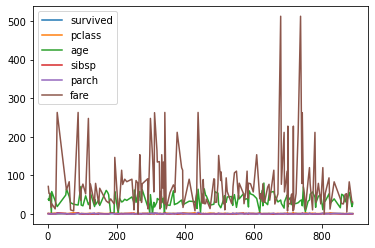

In [107]:
new_df.plot()


In [81]:
px.histogram(ti, x='age', title='Was There An Age Bias?')

In [111]:
ti = pd.read_csv("datasets/titanic.csv")
px.scatter(ti, x='age', y='survived', color='class', size='fare', title='Was There A Class Bias?')



In [83]:
fig = px.pie(ti, values='fare', names='sex', title='Was There A Gender Bias?')
fig.show()